In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random
import cv2
import shapely

# Iteration Plots

In [26]:
def filterdata(gps, embedding, margin=1000):
    positive_gps = []
    positive_embedding = []
    for i in range(len(gps)):
        for j in range(len(gps[i])):
            if gps[i][j] < margin:
                positive_gps.append(gps[i][j])
                positive_embedding.append(abs(1-embedding[i][j]))
    positive_gps = np.array(positive_gps).reshape(-1, 1)
    reg = LinearRegression().fit(positive_gps, positive_embedding)
    return positive_gps, positive_embedding, reg

def plotdata(positive_gps, positive_embedding, reg):
    positive_embedding_pred = reg.predict(positive_gps)    
    plt.scatter(positive_gps, positive_embedding)
    plt.plot(positive_gps, positive_embedding_pred, color='red', linewidth=3)
    plt.show()

## Modified Contrastive Loss

In [27]:
#gps = np.genfromtxt('data/RegressionContrastive/gps.csv', delimiter=',')
#embedding = np.genfromtxt('data/RegressionContrastive/embedding.csv', delimiter=',')
#print(f'No Points: {len(gps)}')
embedding = emb

In [28]:
positive_gps, positive_embedding, reg = filterdata(gps, embedding)
plotdata(positive_gps, positive_embedding, reg)

TypeError: object of type 'numpy.float64' has no len()

In [22]:
print(f'(Gradient, Intercept) = ({reg.coef_[0]}, {reg.intercept_})')

(Gradient, Intercept) = (-4.580900043992026e-06, 0.19256776992977737)


## Modified Contrastive Loss (Trained on full dataset)

In [10]:
gps = np.genfromtxt('data/FullRegressionContrastive/gps.csv', delimiter=',')
embedding = np.genfromtxt('data/FullRegressionContrastive/embedding.csv', delimiter=',')
print(f'No Points: {len(gps)}')

No Points: 1103


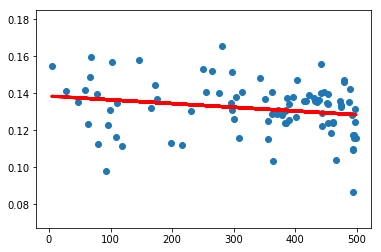

In [11]:
positive_gps, positive_embedding, reg = filterdata(gps, embedding)
plotdata(positive_gps, positive_embedding, reg)

In [36]:
print(f'(Gradient, Intercept) = ({reg.coef_[0]}, {reg.intercept_})')

(Gradient, Intercept) = (-9.282388756603972e-07, 0.13277191313796502)


## Contrastive

In [23]:
gps = np.genfromtxt('data/Contrastive/gps.csv', delimiter=',')
embedding = np.genfromtxt('data/Contrastive/embedding.csv', delimiter=',')
print(f'No Points: {len(gps)}')

No Points: 1103


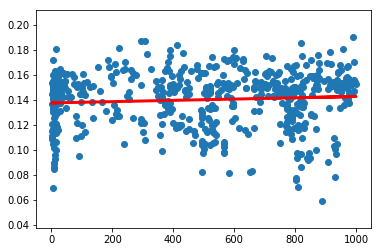

In [24]:
positive_gps, positive_embedding, reg = filterdata(gps, embedding)
plotdata(positive_gps, positive_embedding, reg)

In [25]:
print(f'(Gradient, Intercept) = ({reg.coef_[0]}, {reg.intercept_})')

(Gradient, Intercept) = (5.138916892325146e-06, 0.13776178706981995)


## Linear Overweighted Contrastive

In [26]:
gps = np.genfromtxt('data/Overweighted/gps.csv', delimiter=',')
embedding = np.genfromtxt('data/Overweighted/embedding.csv', delimiter=',')
print(f'No Points: {len(gps)}')

No Points: 1103


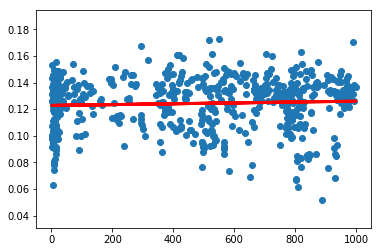

In [27]:
positive_gps, positive_embedding, reg = filterdata(gps, embedding)
plotdata(positive_gps, positive_embedding, reg)

# Iteration Plots

## Positive Point Distribution for different query points

In [8]:
datasets = {1: 'data/IT2/RegressionContrastive', 
            2: 'data/IT2/Contrastive', 
            #3: 'data/IT2/ContinuedContrastive', 
            4: 'data/IT2/OnlyPositiveContrastive',
            5: 'data/IT2/RegContrastiveContinued',
            6: 'data/IT2/CDFTobit/epoch_180',
            7: 'data/IT3/LogTobitAndCDF',
            8: 'data/IT3/LogTobitAndCDF1',
            9: 'data/IT3/RegressionNegNum1',
            10: 'data/IT2/ContrastiveVariantMSE',
            11: 'data/IT3/MSEAndContrastive',
            12: 'data/IT4/MSEAndContrastive/Train',
            13: 'data/IT4/Contrastive/Train',
            14: 'data/IT4/MSEContrativeCombined/Test',
            15: 'data/IT4/MSEOnlyPosZurich/Train',
            16: 'data/IT5/MSEAndContrastive400/Train',
            17: 'data/IT5/MSEContrastiveCombined400/Test',
            18: 'data/IT5/MSEAndContrastive20Meter400/Test',
            19: 'data/IT5/FullDatasetContrastive25Meter/Train',
            20: 'data/IT5/FullDatasetMSEAndContrastive25Meter/Train',
            21: 'data/IT5/FullDatasetMSEAndContrastive/Train', 
            22: 'data/IT5/MSEAndContrastiveSmoothed/Train',
            23: 'data/IT6/LocalCorrelationNet_3Cities/Train',
            24: 'data/IT6/ContrastiveLabelSmoothing/Train',
            25: 'data/IT6/ContrastiveLabelSmoothingGPSMining/Train',
            27: 'data/IT7/GeneralizedContrastiveLoss/Train',
            28: 'data/IT7/GeneralizedMSELoss/Train'}

no = 28
gps = np.genfromtxt(f'{datasets[no]}/gps.csv', delimiter=',')
emb = np.genfromtxt(f'{datasets[no]}/embedding.csv', delimiter=',')
emb = 1-emb

# filter away negatives
for i in range(len(gps)):
    gps[i][gps[i] > 25] = 0
    emb[i][gps[i] > 25] = 1

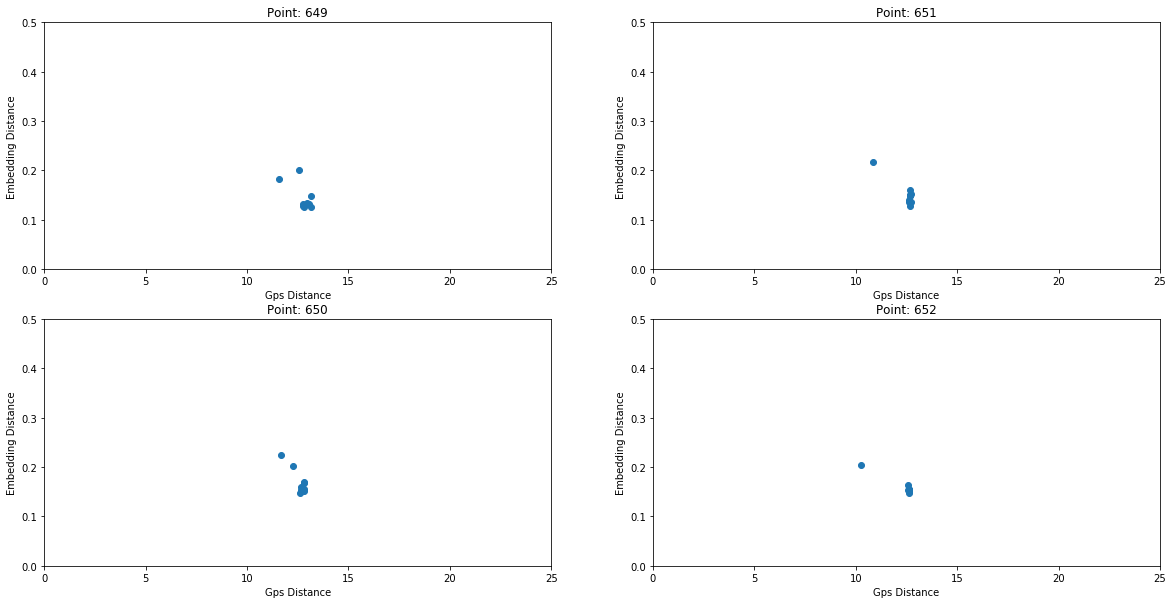

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
seed = random.randint(1,len(gps)-4)

for i in range(4):
    axs[i % 2, i // 2].scatter(gps[seed + i][gps[seed + i] != 0], emb[seed + i][gps[seed + i] != 0]) # Switch axis lims
    #axs[i % 2, i // 2].scatter(emb[seed + i][gps[seed + i] != 0], gps[seed + i][gps[seed + i] != 0])
    axs[i % 2, i // 2].set_ylim([0, 0.5])
    axs[i % 2, i // 2].set_xlim([0, 25])
    axs[i % 2, i // 2].set_title(f'Point: {seed + i}')
    axs[i % 2, i // 2].set_xlabel('Gps Distance')
    axs[i % 2, i // 2].set_ylabel('Embedding Distance')

Text(0.5, 1.0, 'Aggregation of distances')

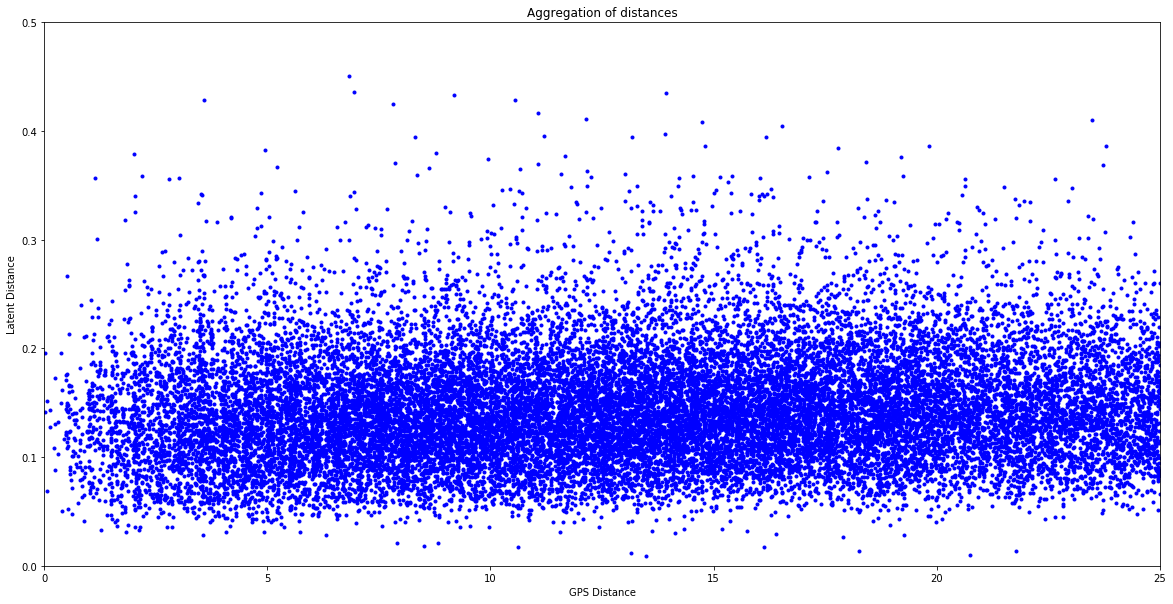

In [10]:
#gps = gps.flatten()
#emb = emb.flatten()

fig, axs = plt.subplots(1, 1, figsize=(20,10))
axs.scatter(gps[gps != 0], emb[gps != 0], color='b', marker='.')
axs.set_xlim([0, 25])
axs.set_ylim([0, 0.5])
axs.set_xlabel('GPS Distance')
axs.set_ylabel('Latent Distance')
axs.set_title('Aggregation of distances')

## Distance at different Epochs

This section compares the distances to the same points, at different stages during training the network (100, 200 and top epoch). 

- Epoch 100: Recall (1,5,10): [0.41704442 0.54669084 0.5893019 ], mAP 5: 0.281610506698902
- Epoch 200: Recall (1,5,10): [0.43155032 0.57026292 0.62012693], mAP 5: 0.30139291830361636
- Epoch Top: Recall (1,5,10): [0.44696283 0.5793291  0.6337262 ], mAP 5: 0.3122917296262718 

In [10]:
gps100 = np.genfromtxt('data/IT2/Contrastive/50Meter/epoch_100/gps.csv', delimiter=',')
gps200 = np.genfromtxt('data/IT2/Contrastive/50Meter/epoch_200/gps.csv', delimiter=',')
gpsbest = np.genfromtxt('data/IT2/Contrastive/50Meter/best/gps.csv', delimiter=',')
emb100 = 1-np.genfromtxt('data/IT2/Contrastive/50Meter/epoch_100/embedding.csv', delimiter=',')
emb200 = 1-np.genfromtxt('data/IT2/Contrastive/50Meter/epoch_200/embedding.csv', delimiter=',')
embbest = 1-np.genfromtxt('data/IT2/Contrastive/50Meter/best/embedding.csv', delimiter=',')

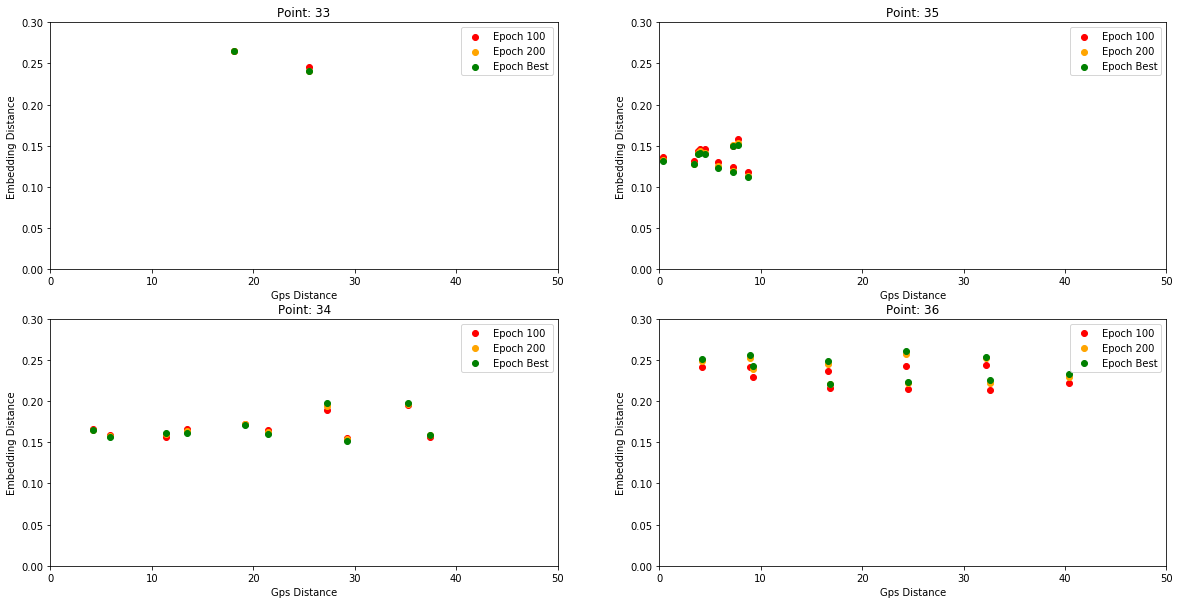

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
seed = random.randint(0, 40)
for i in range(4):
    axs[i % 2, i // 2].scatter(gps100[seed + i][gps100[seed + i] != 0], emb100[seed + i][gps100[seed + i] != 0], color='red', label='Epoch 100')
    axs[i % 2, i // 2].scatter(gps200[seed + i][gps200[seed + i] != 0], emb200[seed + i][gps200[seed + i] != 0], color='orange', label='Epoch 200')
    axs[i % 2, i // 2].scatter(gpsbest[seed + i][gpsbest[seed + i] != 0], embbest[seed + i][gpsbest[seed + i] != 0], color='green', label='Epoch Best')
    axs[i % 2, i // 2].set_title(f'Point: {seed + i}')
    axs[i % 2, i // 2].set_xlabel('Gps Distance')
    axs[i % 2, i // 2].set_ylabel('Embedding Distance')
    axs[i % 2, i // 2].set_xlim([0, 50])
    axs[i % 2, i // 2].set_ylim([0.0, 0.3])
    axs[i % 2, i // 2].legend()

Notes: 
- Generally, points tend to move away 
- Little to no difference between how positives and negatives are moved

[]

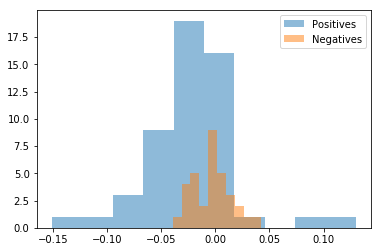

In [125]:
pos_emb_best = np.where(gpsbest <= 25, embbest, embbest*0)
pos_emb_100 = np.where(gps100 <= 25, emb100, emb100*0)

pos_dist = np.zeros(len(emb100))
for i in range(len(emb100)):
    pos_dist[i] = np.sum(pos_emb_best[i] - pos_emb_100[i])

    
neg_emb_best = np.where(gpsbest > 25, embbest, embbest*0)
neg_emb_100 = np.where(gps100 > 25, emb100, emb100*0)

neg_dist = np.zeros(len(emb100))
for i in range(len(emb100)):
    neg_dist[i] = np.sum(neg_emb_best[i] - neg_emb_100[i])
    
plt.hist(pos_dist[pos_dist != 0], alpha=0.5, label='Positives')
plt.hist(neg_dist[neg_dist != 0], alpha=0.5, label='Negatives')
plt.legend()
plt.plot()

In [103]:
pos_mean = pos_dist[pos_dist != 0].mean()
neg_mean = neg_dist[neg_dist != 0].mean()
print('Mean Delta (Positives): {}'.format(pos_mean))
print('Mean Delta (Negatives): {}'.format(neg_mean))

Mean Delta (Positives): -0.021529169036791876
Mean Delta (Negatives): -0.0033454515717246318


## Embedding Distance Histogram

In [126]:
#gpsbest = np.genfromtxt('data/IT2/Contrastive/50Meter/best/gps.csv', delimiter=',')
#embbest = 1-np.genfromtxt('data/IT2/Contrastive/50Meter/best/embedding.csv', delimiter=',')

In [14]:
emb_contrastive = 1-np.genfromtxt(f'{datasets[2]}/embedding.csv', delimiter=',')
emb_con_contrastive = 1-np.genfromtxt(f'{datasets[5]}/embedding.csv', delimiter=',')

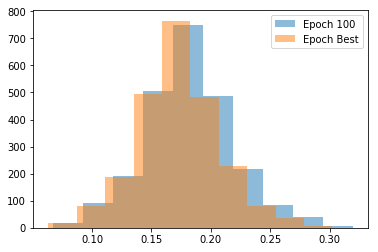

In [15]:
plt.hist(emb_contrastive[emb_contrastive != 1], alpha=0.5, label='Epoch 100')
plt.hist(emb_con_contrastive[emb_con_contrastive != 1], alpha=0.5, label='Epoch Best')
plt.legend()

In [132]:
pos_emb = np.where(gpsbest <= 25, embbest, embbest/embbest)
neg_emb = np.where(gpsbest > 25, embbest, embbest/embbest)

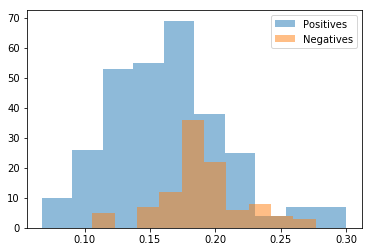

In [133]:
plt.hist(pos_emb[pos_emb != 1], alpha=0.5, label='Positives')
plt.hist(neg_emb[neg_emb != 1], alpha=0.5, label='Negatives')
plt.legend()

## CDF Tobit At Different Stages 

In [20]:
gps20 = np.genfromtxt('data/IT2/CDFTobit/epoch_20/gps.csv', delimiter=',')
gps180 = np.genfromtxt('data/IT2/CDFTobit/epoch_180/gps.csv', delimiter=',')
emb20 = 1-np.genfromtxt('data/IT2/CDFTobit/epoch_20/embedding.csv', delimiter=',')
emb180 = 1-np.genfromtxt('data/IT2/CDFTobit/epoch_180/embedding.csv', delimiter=',')

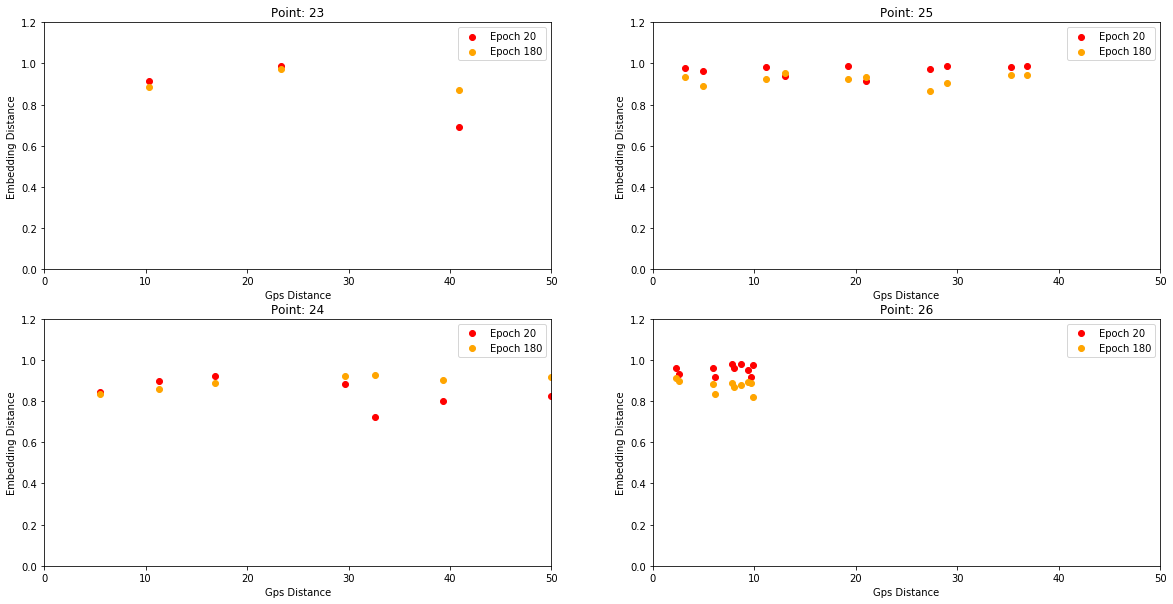

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
seed = random.randint(0, 40)
for i in range(4):
    axs[i % 2, i // 2].scatter(gps20[seed + i][gps20[seed + i] != 0], emb20[seed + i][emb20[seed + i] != 1], color='red', label='Epoch 20')
    axs[i % 2, i // 2].scatter(gps180[seed + i][gps180[seed + i] != 0], emb180[seed + i][emb180[seed + i] != 1], color='orange', label='Epoch 180')
    axs[i % 2, i // 2].set_title(f'Point: {seed + i}')
    axs[i % 2, i // 2].set_xlabel('Gps Distance')
    axs[i % 2, i // 2].set_ylabel('Embedding Distance')
    axs[i % 2, i // 2].set_xlim([0, 50])
    axs[i % 2, i // 2].set_ylim([0.0, 1.2])
    axs[i % 2, i // 2].legend()

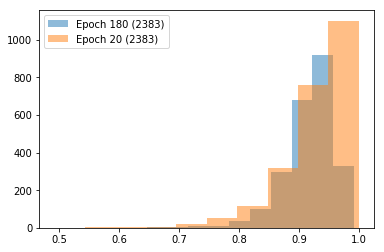

In [37]:
plt.hist(emb180[emb180 != 1], alpha=0.5, label=f'Epoch 180 ({len(emb180[emb180 != 1])})')
plt.hist(emb20[emb20 != 1], alpha=0.5, label=f'Epoch 20 ({len(emb20[emb20 != 1])})')

plt.legend()

In [25]:
print(len(emb180[emb180 != 1]), len(emb20[emb20 != 1]))

2383 2383


## Contrastive Continued with Modified Contrastive

In [38]:
gps = np.genfromtxt(f'{datasets[2]}/gps.csv', delimiter=',')
emb = 1 - np.genfromtxt(f'{datasets[2]}/embedding.csv', delimiter=',')

gps_c = np.genfromtxt(f'{datasets[4]}/gps.csv', delimiter=',')
emb_c = 1 - np.genfromtxt(f'{datasets[4]}/embedding.csv', delimiter=',')

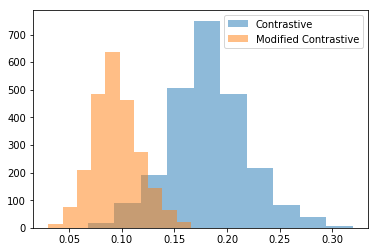

In [40]:
plt.hist(emb[emb != 1], alpha=0.5, label='Contrastive')
plt.hist(emb_c[emb_c != 1], alpha=0.5, label='Modified Contrastive')
plt.legend()

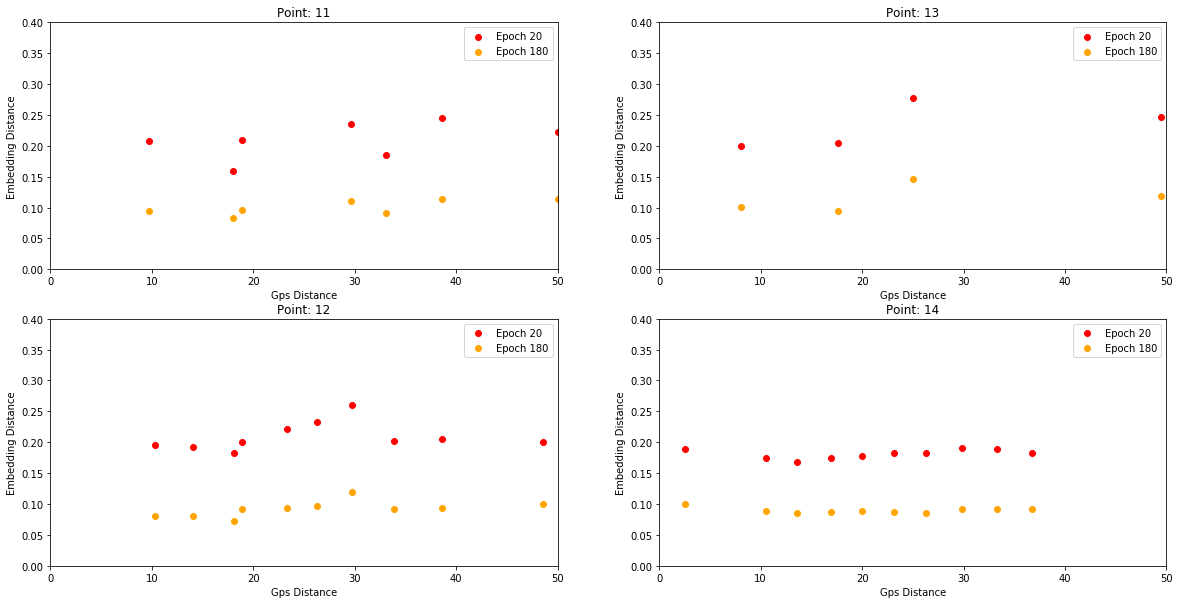

In [146]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
seed = random.randint(0, 40)
for i in range(4):
    axs[i % 2, i // 2].scatter(gps[seed + i][gps[seed + i] != 0], emb[seed + i][emb[seed + i] != 1], color='red', label='Epoch 20')
    axs[i % 2, i // 2].scatter(gps_c[seed + i][gps_c[seed + i] != 0], emb_c[seed + i][emb_c[seed + i] != 1], color='orange', label='Epoch 180')
    axs[i % 2, i // 2].set_title(f'Point: {seed + i}')
    axs[i % 2, i // 2].set_xlabel('Gps Distance')
    axs[i % 2, i // 2].set_ylabel('Embedding Distance')
    axs[i % 2, i // 2].set_xlim([0, 50])
    axs[i % 2, i // 2].set_ylim([0.0, 0.4])
    axs[i % 2, i // 2].legend()

# Iteration 3 Plots

In [5]:
datasets = {7: 'data/IT3/LogTobitAndCDF',
            8: 'data/IT3/RegressionNegNum1',
            9: 'data/IT3/AllAnglesTest'}

no = 10
gps = np.genfromtxt(f'{datasets[no]}/gps.csv', delimiter=',')
angles = np.genfromtxt(f'{datasets[no]}/angles.csv', delimiter=',')
emb = np.genfromtxt(f'{datasets[no]}/embedding.csv', delimiter=',')
emb = 1-emb

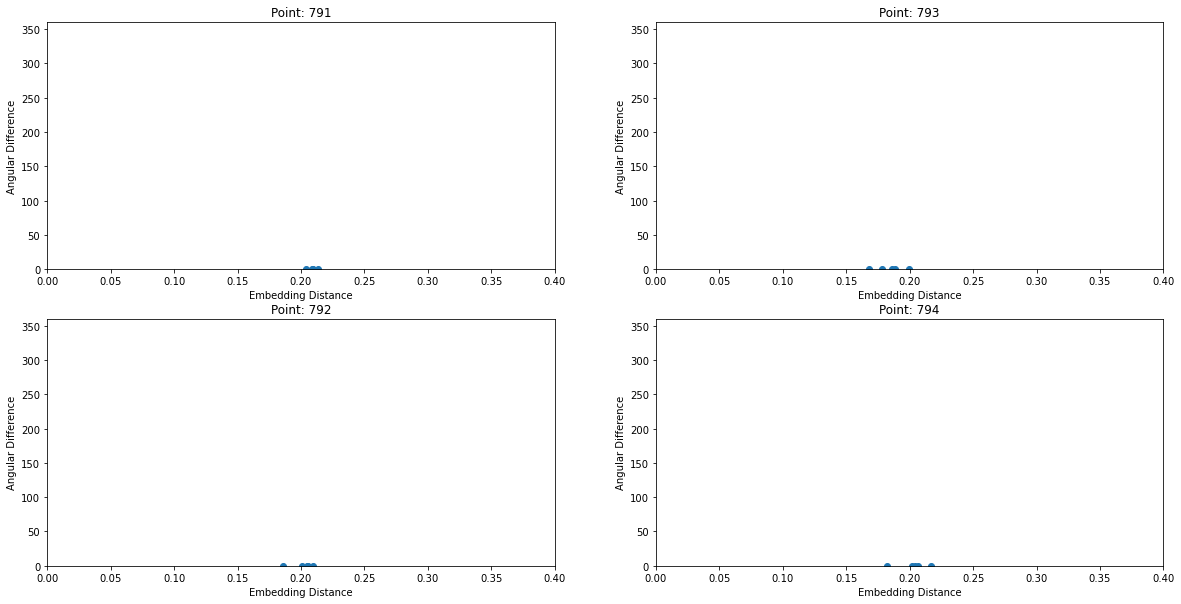

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
seed = random.randint(1,len(gps)-4)

for i in range(4):
    axs[i % 2, i // 2].scatter(emb[seed + i][gps[seed + i] != 0], angles[seed + i][gps[seed + i] != 0])
    axs[i % 2, i // 2].set_xlim([0.0, 0.40])
    axs[i % 2, i // 2].set_ylim([0, 360])
    axs[i % 2, i // 2].set_title(f'Point: {seed + i}')
    axs[i % 2, i // 2].set_xlabel('Embedding Distance')
    axs[i % 2, i // 2].set_ylabel('Angular Difference')

In [14]:
angle_range = []
for i in range(len(gps)):
    a = angles[i][gps[i] != 0]
    angle_range.append(max(a) - min(a))


In [6]:
print(np.array(angle_range).mean())
print(np.median(np.array(angle_range)))

43.50831003199419
14.455718994140675


# Correlation Histograms

In [52]:
def linear_regression_predict(gps, emb):
    reshaped_gps = gps.reshape(-1, 1)
    reshaped_emb = emb.reshape(-1, 1)
    reg = LinearRegression().fit(reshaped_gps, reshaped_emb)
    return reg, reg.predict(reshaped_gps)

In [53]:
datasets = {#1: 'data/IT2/RegressionContrastive', 
            #2: 'data/IT2/Contrastive', 
            #3: 'data/IT2/ContinuedContrastive', 
            #4: 'data/IT2/OnlyPositiveContrastive',
            #5: 'data/IT2/RegContrastiveContinued',
            #6: 'data/IT2/CDFTobit/epoch_180',
            #7: 'data/IT3/LogTobitAndCDF',
            #8: 'data/IT3/LogTobitAndCDF1',
            #9: 'data/IT3/RegressionNegNum1',
            10: 'data/IT2/ContrastiveVariantMSE',
            11: 'data/IT3/MSEAndContrastive',
            12: 'data/IT4/MSEAndContrastive',
            13: 'data/IT4/Contrastive',
            14: 'data/IT4/MSEContrativeCombined',
            15: 'data/IT4/MSEAndContrastive',
            16: 'data/IT4/MSEAndContrastive20Meter',
            17: 'data/IT5/MSEAndContrastive400',
            18: 'data/IT4/MSEOnlyPosZurich',
            19: 'data/IT5/FullDatasetContrastive25Meter',
            20: 'data/IT5/FullDatasetMSEAndContrastive25Meter',
            21: 'data/IT5/FullDatasetMSEAndContrastive'}

NO = 19
MODE = 'Train'
#MODE = 'Test'


gps = np.genfromtxt(f'{datasets[NO]}/{MODE}/gps.csv', delimiter=',')
emb = np.genfromtxt(f'{datasets[NO]}/{MODE}/embedding.csv', delimiter=',')
emb = 1-emb

# filter away negatives
for i in range(len(gps)):
    gps[i][gps[i] > 25] = 0
    emb[i][gps[i] > 25] = 1

In [54]:
coefficients = []
for i in range(len(gps)):
    filtered_gps = gps[i][gps[i] != 0]
    filtered_emb = emb[i][gps[i] != 0]
    if len(filtered_gps) > 2:
        reg, _ = linear_regression_predict(filtered_gps, filtered_emb)
        coefficients.append(reg.coef_[0][0])

In [55]:
bins_list = np.linspace(-0.01, 0.01, num=20)
plt.hist(coefficients1, alpha=0.5, bins=bins_list, label='Contrastive')
plt.hist(coefficients2, alpha=0.5, bins=bins_list, label='MSE')
plt.hist(coefficients, alpha=0.5, bins=bins_list, label='MSE (Only Positive)')
plt.legend()
plt.title('Correlation Gradient Dist.')
plt.show()

NameError: name 'coefficients1' is not defined

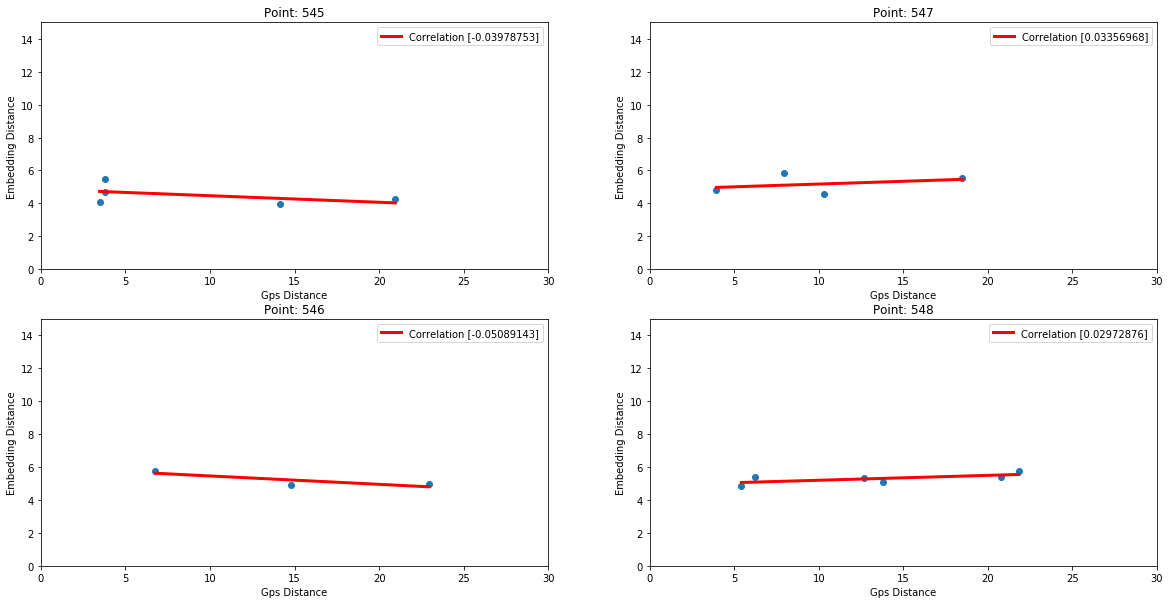

In [59]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
seed = random.randint(1,len(gps)-4)

for i in range(4):
    filtered_emb = emb[seed + i][gps[seed + i] != 0] * 35
    filtered_gps = gps[seed + i][gps[seed + i] != 0]

    reg, predicted = linear_regression_predict(filtered_gps, filtered_emb)
    
    axs[i % 2, i // 2].scatter(filtered_gps, filtered_emb) # Switch axis lims
    #axs[i % 2, i // 2].scatter(emb[seed + i][gps[seed + i] != 0], gps[seed + i][gps[seed + i] != 0])
    axs[i % 2, i // 2].plot(filtered_gps, predicted, color='red', linewidth=3, label=f'Correlation {reg.coef_[0]}')
    #axs[i % 2, i // 2].set_ylim([0.00, 0.30])
    axs[i % 2, i // 2].set_xlim([0, 30])
    axs[i % 2, i // 2].set_ylim([0, 15])
    axs[i % 2, i // 2].set_title(f'Point: {seed + i}')
    axs[i % 2, i // 2].set_xlabel('Gps Distance')
    axs[i % 2, i // 2].set_ylabel('Embedding Distance')
    axs[i % 2, i // 2].legend()


# Correlation with Images

In [3]:
#datasets = {16: 'data/IT4/MSEAndContrastive20Meter'}
datasets = {16: 'data/IT5/MSEAndContrastive400',
            21: 'data/IT5/FullDatasetMSEAndContrastive',
            24: 'data/IT6/ContrastiveLabelSmoothing', 
            25: 'data/IT6/ContrastiveLabelSmoothingGPSMining',
            26: 'data/IT6/ContrastiveLabelSmoothingGPSMiningV2',
            27: 'data/IT7/GeneralizedContrastiveLoss',
            28: 'data/IT7/GeneralizedMSELoss'
           }
    

NO = 28
MODE = 'Train'
#MODE = 'Test'


#pics = np.genfromtxt(f'{datasets[NO]}/{MODE}/pictures.csv', delimiter=',')
with open(f'{datasets[NO]}/{MODE}/pictures.csv', "r") as f:
    pics = f.readlines()

for i in range(1, len(pics)):
    pics[i] = pics[i].split(',')
    
gps = np.genfromtxt(f'{datasets[NO]}/{MODE}/gps.csv', delimiter=',')
emb = np.genfromtxt(f'{datasets[NO]}/{MODE}/embedding.csv', delimiter=',')
emb = 1-emb

# filter away negatives
for i in range(len(gps)):
    emb[i][gps[i] > 25] = 1
    gps[i][gps[i] > 25] = 0

In [69]:
#gen_con_gps,gen_con_lat  = gps[seed], emb[seed]
gen_mse_gps,gen_mse_lat = gps[seed], emb[seed]

Text(0.5, 1.0, 'Point: 3221')

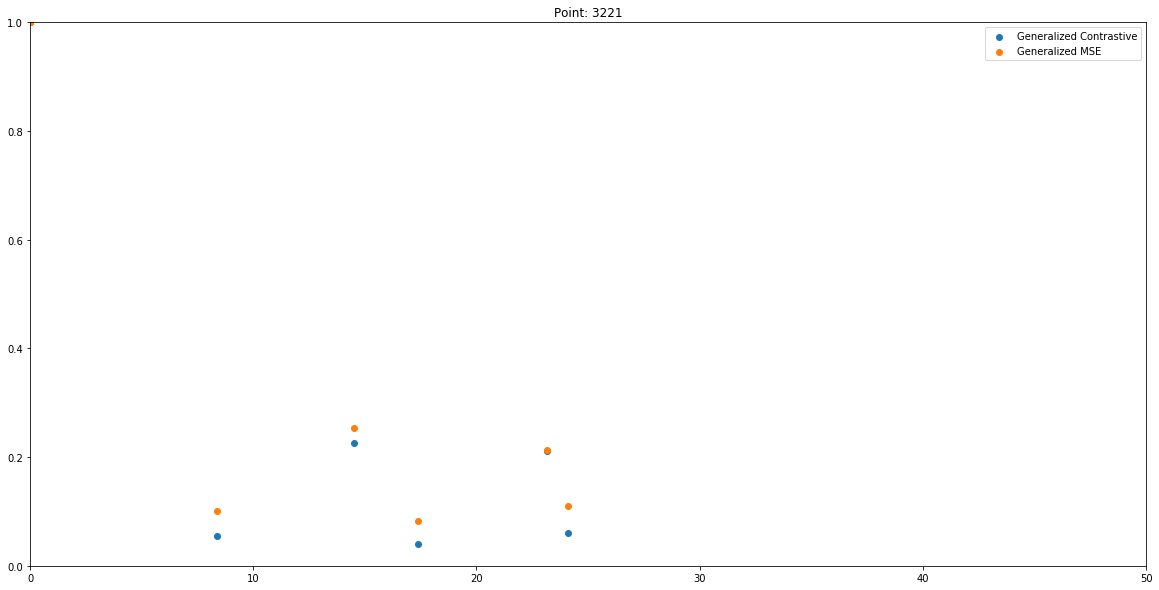

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
seed = 3221 #random.randint(1,len(gps)-4)
plt.scatter(gen_con_gps,gen_con_lat, label='Generalized Contrastive')
plt.scatter(gen_mse_gps,gen_mse_lat, label='Generalized MSE')
plt.xlim((0,50))
plt.ylim((0,1.0))
plt.legend()
plt.title(f'Point: {seed}')

Text(0.5, 1.0, 'Point: 3221')

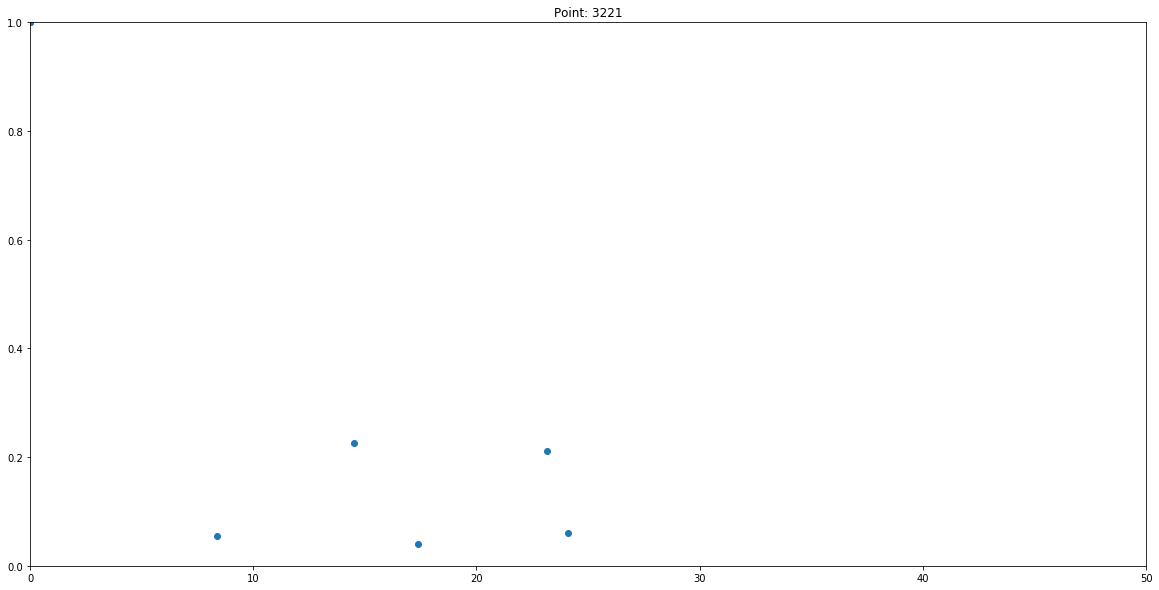

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
seed = random.randint(1,len(gps)-4)

plt.scatter(gps[seed], emb[seed])
plt.xlim((0,50))
plt.ylim((0,1.0))
plt.title(f'Point: {seed}')

## Field of View

DDb7lapO-czjhb6o_J1MxA
zFzarHuCvI73RJf_7MlkLQ.jpg
VrJfd57eglX5LskATygIiQ.jpg
XF9EaQsEE5V3WyO9sNu-6A.jpg
KiFXKBjFgBIOondz8Rm2Cg.jpg


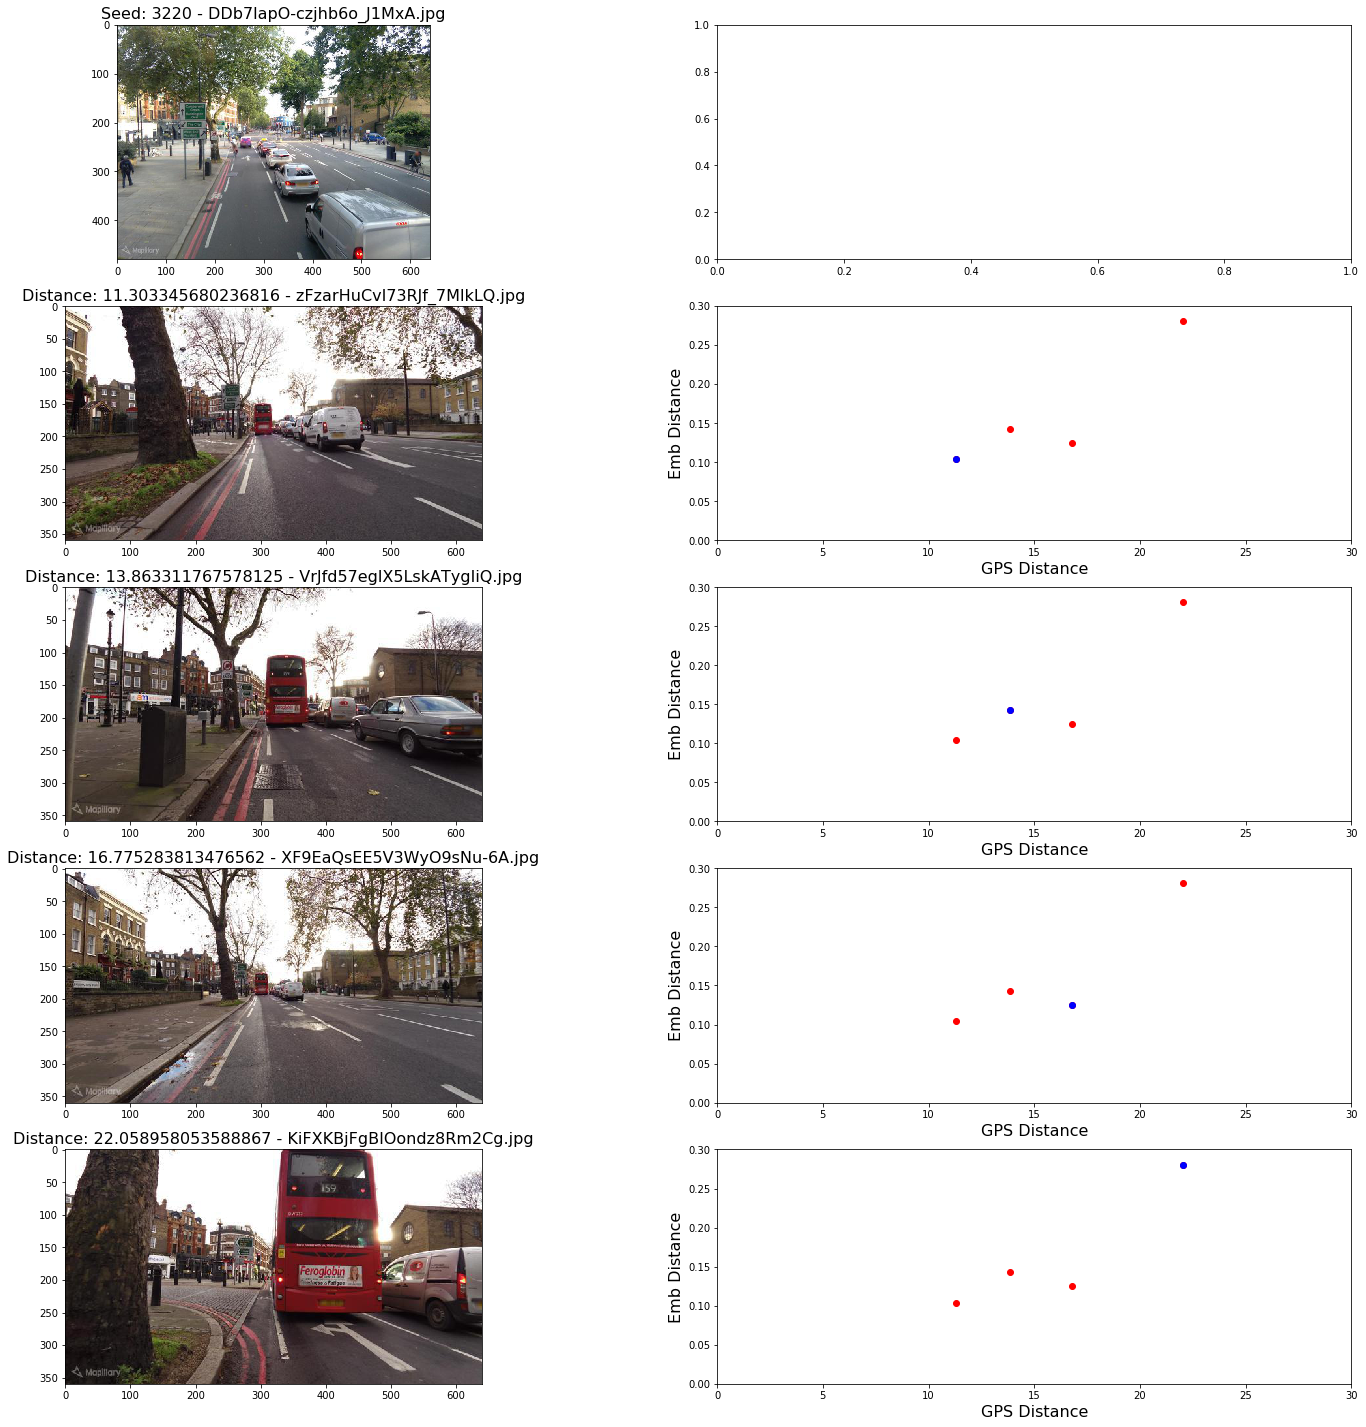

In [40]:
# 1558, 
seed = random.randint(1,len(gps)-4)
MAX_PLOTS = 5

filtered_gps = gps[seed][gps[seed] != 0]
fig, axs = plt.subplots(min(MAX_PLOTS, len(filtered_gps)+1), 2, figsize=(25,25))

for i, point in enumerate(gps[seed]):
    if i > 0:
        if gps[seed][i-1] == 0.0:
            break
        if i >= MAX_PLOTS:
            break
    
    if i == 0:
        filename = pics[seed][i]
        if 'london' in pics[seed][1]:
            file_path = f'{datasets[16]}/{MODE}/images/london/query/images/{filename}.jpg'
        else:
            file_path = f'{datasets[16]}/{MODE}/images/zurich/query/images/{filename}.jpg'
    else:
        filename = pics[seed][i][-26:]
        if 'london' in pics[seed][i]:
            file_path = f'{datasets[16]}/{MODE}/images/london/database/images/{filename}'
        else:
            file_path = f'{datasets[16]}/{MODE}/images/zurich/database/images/{filename}'
        
    img = plt.imread(file_path, format=None)
    axs[i,0].imshow(img)
    if i == 0:
        #print(f'{filename}.jpg')
        print(filename)
        axs[i,0].set_title(f'Seed: {seed} - {filename}.jpg', fontsize=16)
    else:
        print(filename)
        axs[i,0].set_title(f'Distance: {gps[seed][i-1]} - {filename}', fontsize=16)
        axs[i,1].scatter(gps[seed], emb[seed], color='r')
        axs[i,1].scatter(gps[seed][i-1], emb[seed][i-1], color='b')
        axs[i,1].set_xlim([0, 30])
        axs[i,1].set_ylim([0, 0.3])
        axs[i,1].set_xlabel('GPS Distance', fontsize=16)
        axs[i,1].set_ylabel('Emb Distance', fontsize=16)

(0, 30)

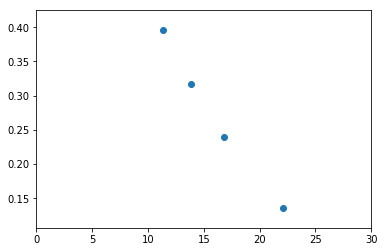

In [41]:
ious = [0.3963671926717596, 0.3172257843428852, 0.24026862767201004, 0.1352368533244138]
plt.scatter(gps[seed][:len(ious)], ious)
plt.xlim((0, 30))